In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
import optuna

In [2]:
custom_palette = ["gray", "green", "antiquewhite"]
sns.set_palette(custom_palette)
sns.set_style("darkgrid")

In [3]:
url_gray = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/gray_surface.csv"
url_green = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/green_surface.csv"
url_table = "https://raw.githubusercontent.com/phule1812/surface_classification/refs/heads/main/dataset/table_surface.csv"

In [4]:
df_gray = pd.read_csv(url_gray, sep = ";").drop(columns = ['Unnamed: 43'])
df_green = pd.read_csv(url_green, sep = ';').drop(columns = ['Unnamed: 43'])
df_table = pd.read_csv(url_table, sep = ';').drop(columns = ['Unnamed: 43'])

df_gray.columns = df_gray.iloc[1]
df_green.columns = df_green.iloc[1]
df_table.columns = df_table.iloc[1]

df_gray = df_gray.iloc[2:]
df_green = df_green.iloc[2:]
df_table = df_table.iloc[2:]

In [5]:
df_gray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21558 entries, 2 to 21559
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movedir    21558 non-null  object
 1   xsetspeed  21558 non-null  object
 2   ysetspeed  21558 non-null  object
 3   setvel     21558 non-null  object
 4   m1setvel   21558 non-null  object
 5   m2setvel   21558 non-null  object
 6   m3setvel   21558 non-null  object
 7   m1pos      21558 non-null  object
 8   m2pos      21558 non-null  object
 9   m3pos      21558 non-null  object
 10  m1vel      21558 non-null  object
 11  m2vel      21558 non-null  object
 12  m3vel      21558 non-null  object
 13  m1cur      21558 non-null  object
 14  m2cur      21558 non-null  object
 15  m3cur      21558 non-null  object
 16  xcur       21558 non-null  object
 17  ycur       21558 non-null  object
 18  rotcur     21558 non-null  object
 19  xpos       21558 non-null  object
 20  ypos       21558 non-null  o

In [6]:
def count_nan(df):
    for column in df.columns:
        numbers_nan_column = df[column].isna().sum()
        if numbers_nan_column > 0:
            print(f'Number of NaN in column {column}: {numbers_nan_column}')
            print(f'Ratio  of Nan in columns {column}: {round(numbers_nan_column/df.shape[0]*100, 2)}%')

In [7]:
count_nan(df_gray)

Number of NaN in column m1tor: 1921
Ratio  of Nan in columns m1tor: 8.91%
Number of NaN in column m2tor: 2214
Ratio  of Nan in columns m2tor: 10.27%
Number of NaN in column m3tor: 1802
Ratio  of Nan in columns m3tor: 8.36%


In [8]:
count_nan(df_green)

Number of NaN in column m1tor: 2332
Ratio  of Nan in columns m1tor: 9.17%
Number of NaN in column m2tor: 2036
Ratio  of Nan in columns m2tor: 8.0%
Number of NaN in column m3tor: 2394
Ratio  of Nan in columns m3tor: 9.41%


In [9]:
count_nan(df_table)

Number of NaN in column m1tor: 439
Ratio  of Nan in columns m1tor: 5.77%
Number of NaN in column m2tor: 617
Ratio  of Nan in columns m2tor: 8.11%
Number of NaN in column m3tor: 805
Ratio  of Nan in columns m3tor: 10.59%


In [10]:
def fill_nan(df):
    # Get only float value
    df = df.astype("float")
    for column in df.columns:
        df[column].fillna(df[column].mean(), inplace = True)
    return df

In [11]:
df_gray = fill_nan(df_gray)
df_green = fill_nan(df_green)
df_table = fill_nan(df_table)

df_gray['color'] = "gray"
df_green['color'] = "green"
df_table['color'] = "table"

In [12]:
df = pd.concat([df_gray, df_green, df_table], ignore_index = True)
df.head()

1,movedir,xsetspeed,ysetspeed,setvel,m1setvel,m2setvel,m3setvel,m1pos,m2pos,m3pos,...,w2effvel,w2slip,m2vol,m2tor,w3vel,w3effvel,w3slip,m3vol,m3tor,color
0,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1035.0,18.0,1039.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.009376,0.994105,7.568766,0.350820,gray
1,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1185.0,19.0,1178.0,...,0.0,0.0,-0.415301,-0.007532,1.590431,0.683054,0.570523,8.526490,0.455350,gray
2,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1470.0,22.0,1458.0,...,0.0,0.0,0.000000,0.001593,1.590431,0.670479,0.578429,10.031590,0.646921,gray
3,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1745.0,24.0,1733.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.020060,0.985811,10.847660,0.873064,gray
4,0.0,0.1,0.0,0.0,-34.641,0.0,34.641,-1894.0,24.0,1866.0,...,0.0,0.0,0.000000,0.001593,1.413719,0.687064,0.514003,8.248019,0.486188,gray


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54597 entries, 0 to 54596
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movedir    54597 non-null  float64
 1   xsetspeed  54597 non-null  float64
 2   ysetspeed  54597 non-null  float64
 3   setvel     54597 non-null  float64
 4   m1setvel   54597 non-null  float64
 5   m2setvel   54597 non-null  float64
 6   m3setvel   54597 non-null  float64
 7   m1pos      54597 non-null  float64
 8   m2pos      54597 non-null  float64
 9   m3pos      54597 non-null  float64
 10  m1vel      54597 non-null  float64
 11  m2vel      54597 non-null  float64
 12  m3vel      54597 non-null  float64
 13  m1cur      54597 non-null  float64
 14  m2cur      54597 non-null  float64
 15  m3cur      54597 non-null  float64
 16  xcur       54597 non-null  float64
 17  ycur       54597 non-null  float64
 18  rotcur     54597 non-null  float64
 19  xpos       54597 non-null  float64
 20  ypos  

<Axes: xlabel='color', ylabel='count'>

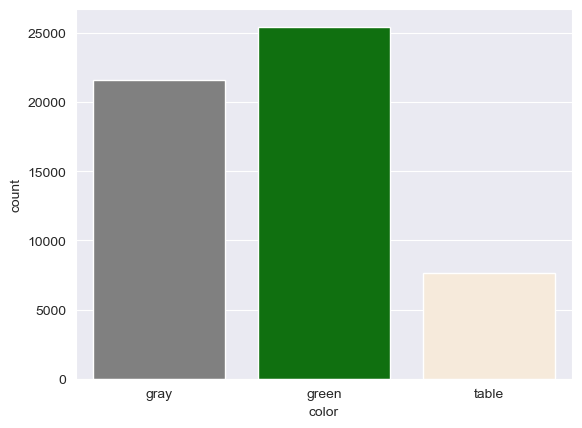

In [14]:
sns.countplot(x = "color", data = df, hue = "color")

In [15]:
from sklearn.preprocessing import LabelEncoder

output_encoder = LabelEncoder()
df['color_labels'] = output_encoder.fit_transform(df[["color"]])

In [16]:
df.drop(columns = ["color"], inplace = True)

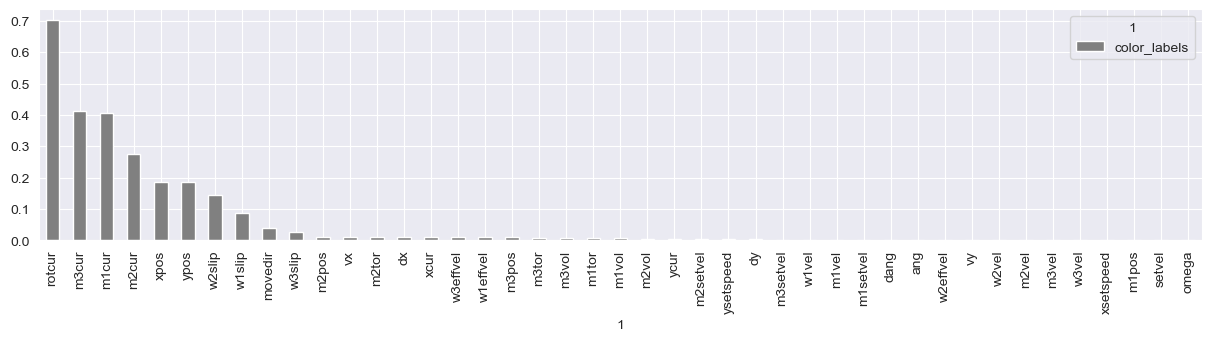

In [17]:
# correlation_matrix = df.corr()
# correlation_matrix[["Gray", "Green", "Table"]].sort_values(by = "color_labels", ascending = False)

correlation_matrix = df.corr()
correlation_matrix[['color_labels']].abs().sort_values(by = "color_labels", ascending = False)[1:].plot.bar(figsize = (15, 3))
plt.show()

In [18]:
df.drop(columns = ['omega', 'setvel', 'xsetspeed',
                   'ysetspeed', 'w1vel', 'w2vel',
                   'w3vel', 'm1vel', 'm2vel',
                   'm3vel', 'ang', 'dang',
                   'm1setvel', 'm2setvel', 'm3setvel'], inplace = True)

In [19]:
corr_matrix = df.corr().abs()

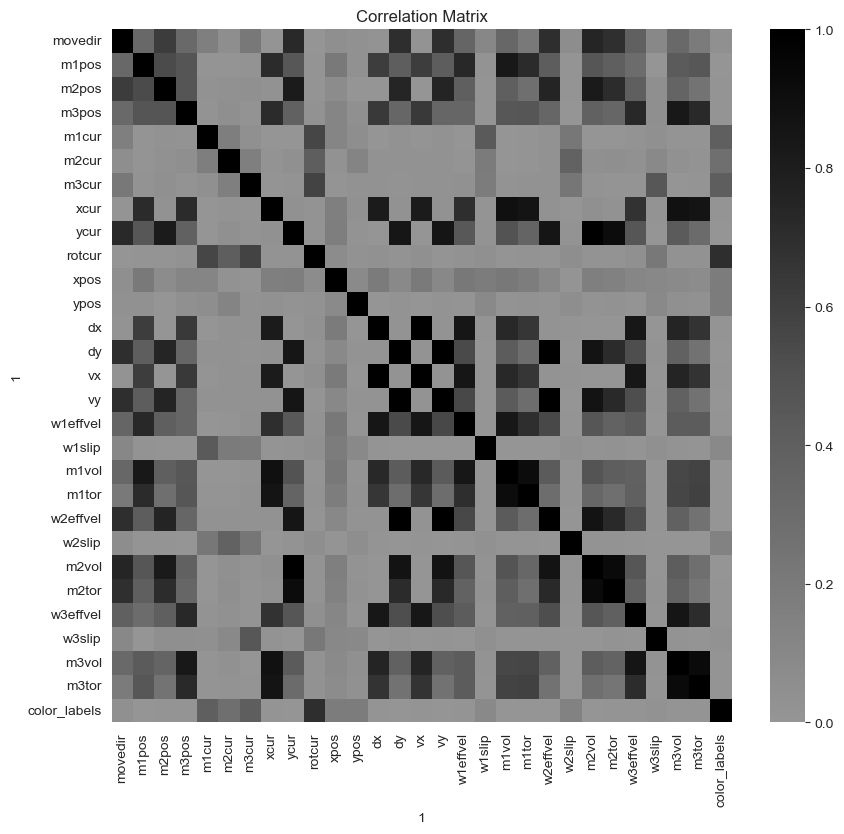

In [20]:
# Create a heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, vmin= 0, vmax=1, center=0, cmap = 'Greys')
plt.title('Correlation Matrix')
plt.show()

## Training the models

In [21]:
from sklearn.preprocessing import OneHotEncoder

output_encoder = OneHotEncoder()
color_labels = output_encoder.fit_transform(df[["color_labels"]])
color_labels.shape

(54597, 3)

In [22]:
X = df.drop(columns = ["color_labels"])
y = output_encoder.fit_transform(df[["color_labels"]]).toarray()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

In [25]:
def print_metrics(model, X_valid, y_valid):
  y_pred = model.predict(X_valid)
  y_pred_proba = model.predict_proba(X_valid)

  print("Accuracy: ", round(accuracy_score(y_valid, y_pred), 3))
  print("Precision: ", precision_score(y_valid, y_pred, average = None).round(3))
  print("Recall: ", recall_score(y_valid, y_pred, average = None).round(3))
  print("F1 score: ", f1_score(y_valid, y_pred, average = None).round(3))
  print("ROC AUC:", roc_auc_score(y_valid, y_pred_proba,
              multi_class = 'ovr', average = None).round(3))

In [26]:
def plot_ROC_curve(model, X_valid, y_valid):
  plt.figure(figsize = (15, 5))
  classes = ["Gray", "Green", "Table"]
   # Calculate ROC AUC scores
  roc_auc_scores = roc_auc_score(y_valid, model.predict_proba(X_valid), labels = model.classes_,
              multi_class = 'ovr', average = None).round(3)
  for i in range(3):
    c = classes[i]
    roc_auc = roc_auc_scores[i]

    fpr, tpr, thresholds = roc_curve(y_valid[:, i], model.predict_proba(X_valid)[:, i])
    ax = plt.subplot(1,3 ,i+1)
    ax.plot(fpr, tpr, linewidth=2, label=f"ROC curve {c}", c = "b")
    ax.plot([0, 1], [0 ,1], '--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC AUC {c} : {roc_auc}")
    ax.legend()

### 1. Decision Tree

In [27]:
tree_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', OneVsRestClassifier(DecisionTreeClassifier(random_state = 42)))
])

tree_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree',
                 OneVsRestClassifier(estimator=DecisionTreeClassifier(random_state=42)))])

In [28]:
print_metrics(tree_clf, X_valid, y_valid)

Accuracy:  0.96
Precision:  [0.976 0.972 0.996]
Recall:  [0.973 0.976 0.99 ]
F1 score:  [0.975 0.974 0.993]
ROC AUC: [0.979 0.975 0.995]


In [29]:
print_metrics(tree_clf, X_test, y_test)

Accuracy:  0.961
Precision:  [0.973 0.973 0.993]
Recall:  [0.978 0.973 0.995]
F1 score:  [0.975 0.973 0.994]
ROC AUC: [0.98  0.975 0.997]


In [30]:
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', [None, 'auto', 'sqrt', 'log2'])
    }
    
    tree_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', OneVsRestClassifier(DecisionTreeClassifier(**params, random_state=42)))
    ])
    
    score = accuracy_score(y_valid, tree_clf.fit(X_train, y_train).predict(X_valid))
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters
# print("Best parameters: ")
# print(study.best_params)

[I 2024-11-20 14:59:49,341] A new study created in memory with name: no-name-f14ce4c6-d681-4908-b738-11a9c2f19339
[I 2024-11-20 14:59:49,542] Trial 0 finished with value: 0.6949786324786325 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.6949786324786325.
[I 2024-11-20 14:59:49,977] Trial 1 finished with value: 0.8881257631257631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'auto'}. Best is trial 1 with value: 0.8881257631257631.
[I 2024-11-20 14:59:50,060] Trial 2 finished with value: 0.3756868131868132 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.8881257631257631.
[I 2024-11-20 14:59:50,501] Trial 3 finished with value: 0.88

[I 2024-11-20 15:00:27,069] Trial 30 finished with value: 0.9558913308913309 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 21 with value: 0.9568070818070818.
[I 2024-11-20 15:00:29,427] Trial 31 finished with value: 0.9552808302808303 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 21 with value: 0.9568070818070818.
[I 2024-11-20 15:00:31,681] Trial 32 finished with value: 0.9556623931623932 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 21 with value: 0.9568070818070818.
[I 2024-11-20 15:00:33,822] Trial 33 finished with value: 0.9538308913308914 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 7, 'min_sample

In [31]:
study.best_params

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 22,
 'min_samples_split': 13,
 'min_samples_leaf': 3,
 'max_features': None}

In [27]:
best_params_tree = {'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 22,
 'min_samples_split': 13,
 'min_samples_leaf': 3,
 'max_features': None}

In [28]:
best_tree_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', OneVsRestClassifier(DecisionTreeClassifier(**best_params_tree, random_state=42)))
    ])

best_tree_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree',
                 OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=22,
                                                                      min_samples_leaf=3,
                                                                      min_samples_split=13,
                                                                      random_state=42)))])

In [29]:
print_metrics(best_tree_clf, X_train, y_train)

Accuracy:  0.984
Precision:  [0.992 0.99  0.999]
Recall:  [0.989 0.988 0.996]
F1 score:  [0.99  0.989 0.997]
ROC AUC: [1. 1. 1.]


In [30]:
print_metrics(best_tree_clf, X_valid, y_valid)

Accuracy:  0.958
Precision:  [0.972 0.976 0.998]
Recall:  [0.973 0.97  0.988]
F1 score:  [0.973 0.973 0.993]
ROC AUC: [0.986 0.984 0.997]


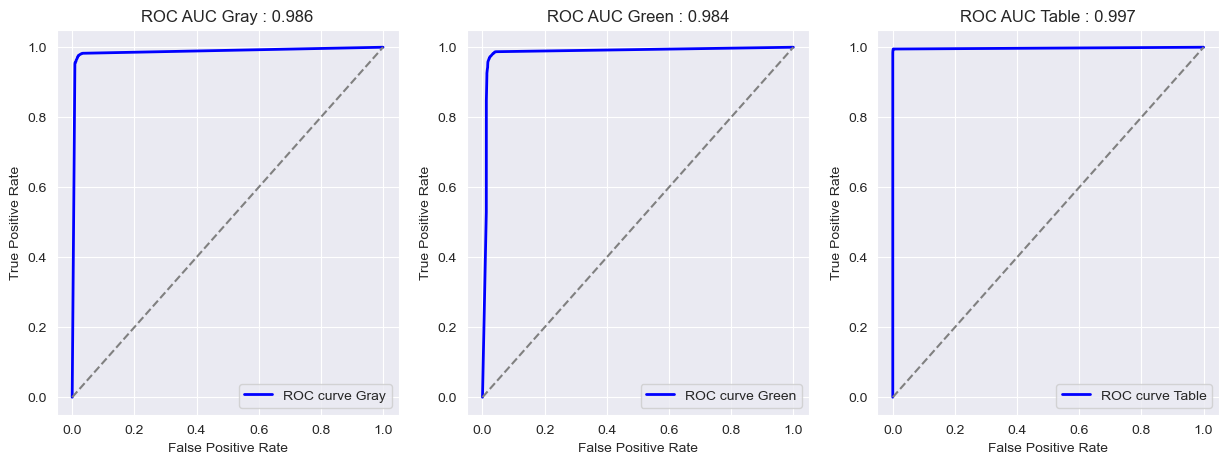

In [35]:
plot_ROC_curve(best_tree_clf, X_valid, y_valid)

In [36]:
print_metrics(best_tree_clf, X_test, y_test)

Accuracy:  0.956
Precision:  [0.968 0.973 0.996]
Recall:  [0.974 0.966 0.993]
F1 score:  [0.971 0.969 0.995]
ROC AUC: [0.987 0.983 0.997]


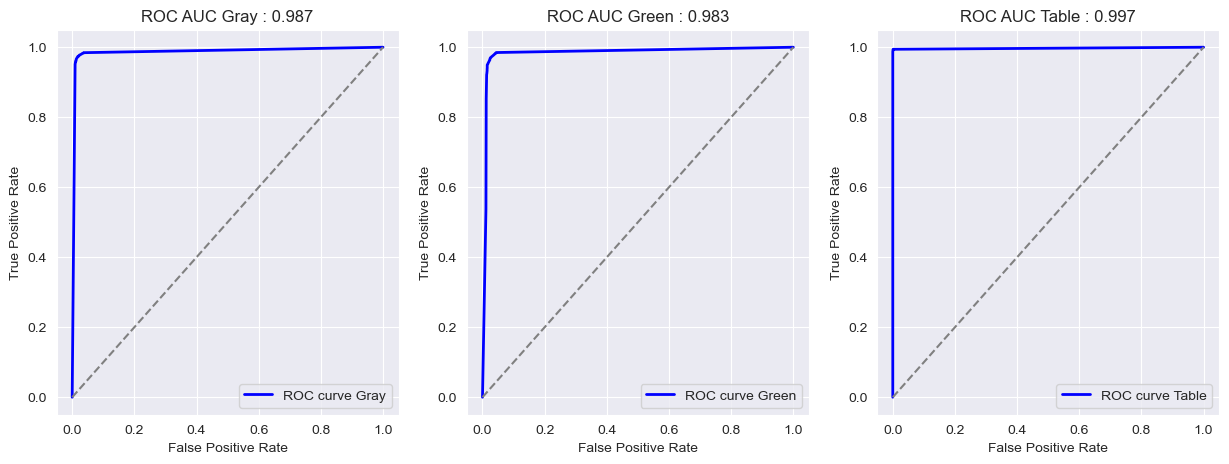

In [37]:
plot_ROC_curve(best_tree_clf, X_test, y_test)

### 2. Random Forest

In [38]:
forest_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', OneVsRestClassifier(RandomForestClassifier(random_state = 42)))
])

forest_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [39]:
print_metrics(forest_clf, X_valid, y_valid)

Accuracy:  0.987
Precision:  [0.99  0.986 1.   ]
Recall:  [0.984 0.993 0.99 ]
F1 score:  [0.987 0.989 0.995]
ROC AUC: [0.999 0.999 1.   ]


In [40]:
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 20, 50, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    model = Pipeline([
        ('scaler', StandardScaler()),
        ('random_forest', OneVsRestClassifier(RandomForestClassifier(**params, random_state=42)))
    ])

    score = accuracy_score(y_valid, model.fit(X_train, y_train).predict(X_valid))
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-11-20 15:03:09,496] A new study created in memory with name: no-name-38aa36ca-2e99-4d8e-89d2-72ff8589aec7
[I 2024-11-20 15:03:52,024] Trial 0 finished with value: 0.970467032967033 and parameters: {'n_estimators': 144, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 0 with value: 0.970467032967033.
[I 2024-11-20 15:04:26,475] Trial 1 finished with value: 0.9705433455433455 and parameters: {'n_estimators': 103, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9705433455433455.
[I 2024-11-20 15:04:55,818] Trial 2 finished with value: 0.9668040293040293 and parameters: {'n_estimators': 87, 'max_depth': 39, 'min_samples_split': 13, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9705433455433455.
[I 2024-11-20 15:05:19,846] Trial 3 finished with value: 0.9816086691086691 and parameters: {'n_estimators': 64, 'max_depth': 44, 

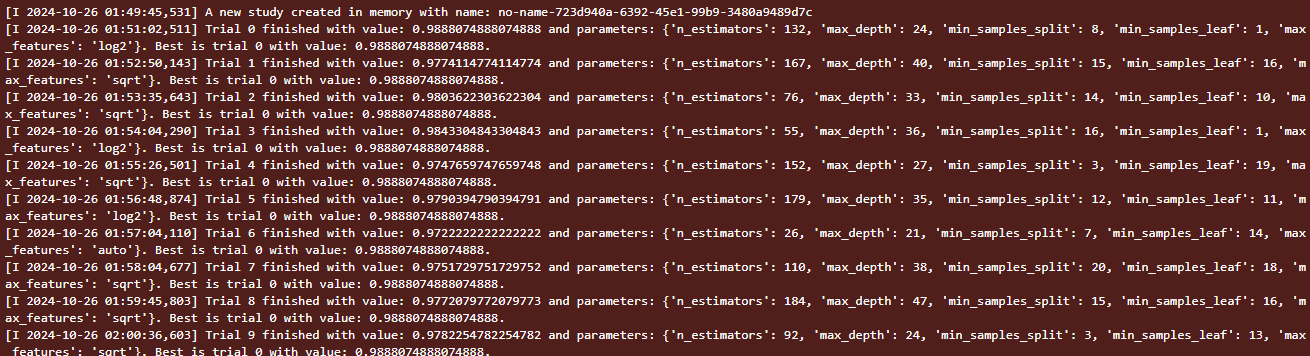

In [41]:
study.best_params

{'n_estimators': 64,
 'max_depth': 44,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

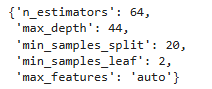

In [31]:
best_params_forest = {'n_estimators': 64,
 'max_depth': 44,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [32]:
best_forest_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', OneVsRestClassifier(RandomForestClassifier(**best_params_forest, random_state=42)))
    ])

best_forest_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=44,
                                                                      max_features='auto',
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=20,
                                                                      n_estimators=64,
                                                                      random_state=42)))])

In [33]:
print_metrics(best_forest_clf, X_train, y_train)

Accuracy:  0.994
Precision:  [0.997 0.993 1.   ]
Recall:  [0.993 0.999 0.994]
F1 score:  [0.995 0.996 0.997]
ROC AUC: [1. 1. 1.]


In [34]:
print_metrics(best_forest_clf, X_valid, y_valid)

Accuracy:  0.982
Precision:  [0.986 0.981 1.   ]
Recall:  [0.975 0.991 0.988]
F1 score:  [0.98  0.986 0.994]
ROC AUC: [0.999 0.999 1.   ]


In [35]:
print_metrics(best_forest_clf, X_test, y_test)

Accuracy:  0.982
Precision:  [0.988 0.979 1.   ]
Recall:  [0.977 0.991 0.991]
F1 score:  [0.983 0.985 0.995]
ROC AUC: [0.999 0.999 1.   ]


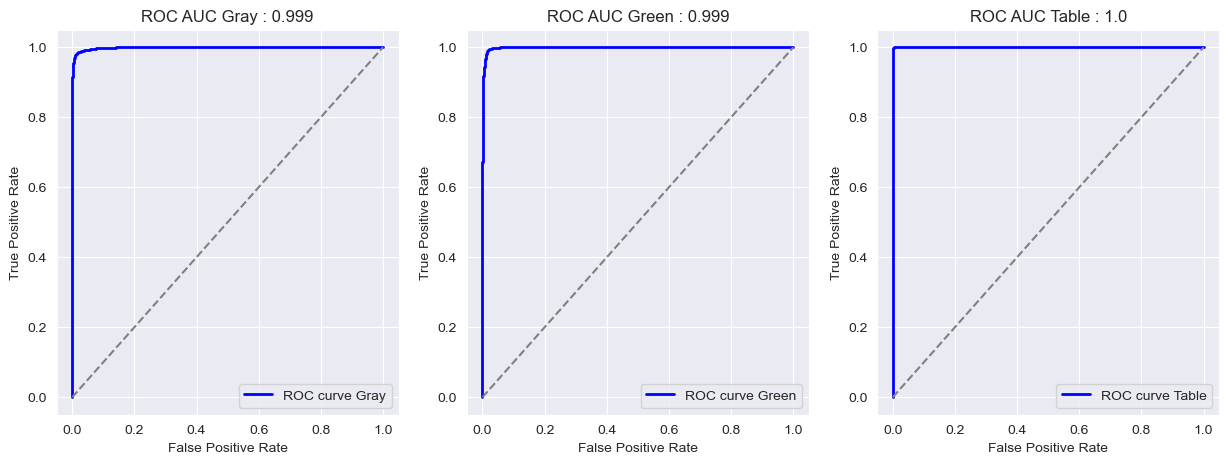

In [47]:
plot_ROC_curve(best_forest_clf, X_valid, y_valid)

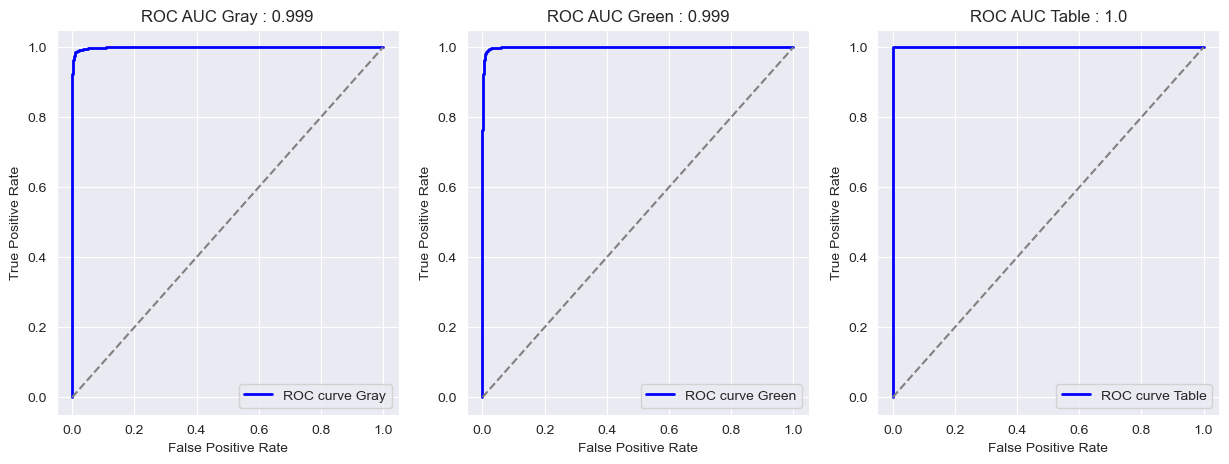

In [48]:
plot_ROC_curve(best_forest_clf, X_test, y_test)

### 3. Logistic Regression

In [36]:
logistic_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_reg', OneVsRestClassifier(LogisticRegression(random_state = 42)))
])

logistic_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_reg',
                 OneVsRestClassifier(estimator=LogisticRegression(random_state=42)))])

In [38]:
print_metrics(logistic_clf, X_train, y_train)

Accuracy:  0.715
Precision:  [0.784 0.773 0.997]
Recall:  [0.742 0.757 0.994]
F1 score:  [0.762 0.765 0.995]
ROC AUC: [0.892 0.862 0.998]


In [39]:
print_metrics(logistic_clf, X_valid, y_valid)

Accuracy:  0.72
Precision:  [0.778 0.789 0.999]
Recall:  [0.749 0.762 0.987]
F1 score:  [0.764 0.776 0.993]
ROC AUC: [0.894 0.865 0.998]


In [40]:
print_metrics(logistic_clf, X_test, y_test)

Accuracy:  0.709
Precision:  [0.77  0.772 0.998]
Recall:  [0.738 0.748 0.99 ]
F1 score:  [0.754 0.76  0.994]
ROC AUC: [0.886 0.853 0.998]


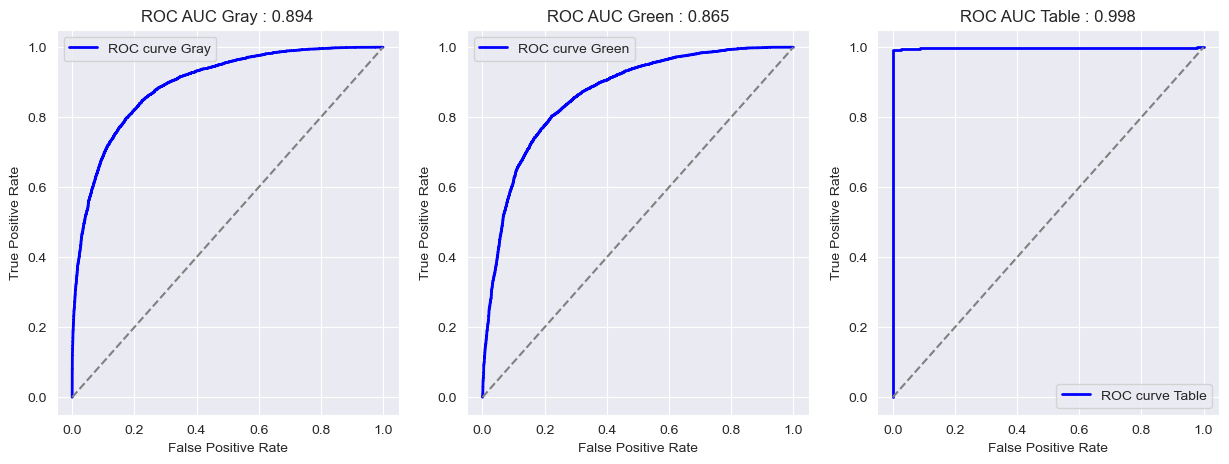

In [41]:
plot_ROC_curve(logistic_clf, X_valid, y_valid)

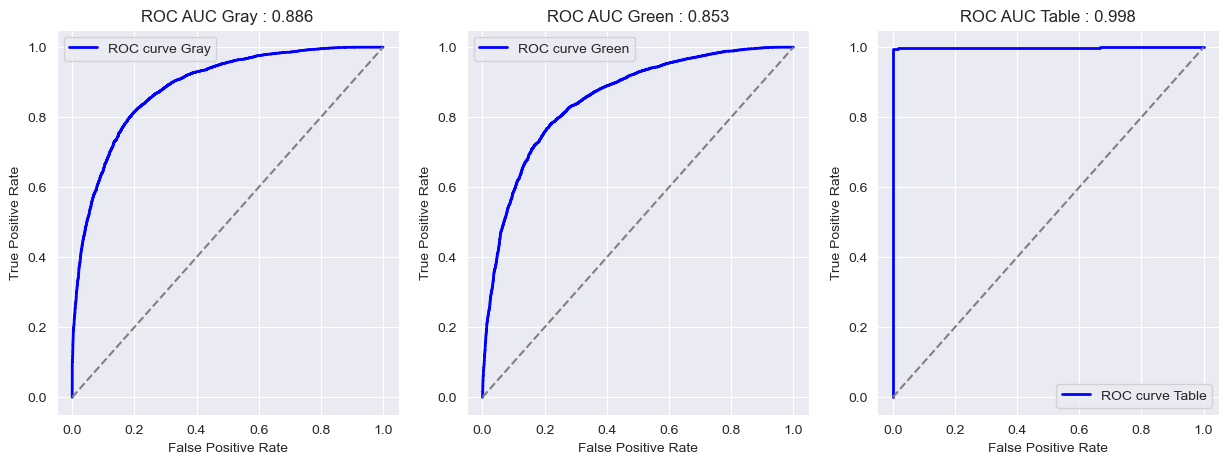

In [42]:
plot_ROC_curve(logistic_clf, X_test, y_test)

### 4. CatBoost Classifier

In [44]:
from catboost import CatBoostClassifier

In [54]:
catboost_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('catboost', OneVsRestClassifier(CatBoostClassifier(random_state = 42, 
                                                        eval_metric = 'Accuracy', 
                                                        # loss_function = 'LogLog', 
                                                        task_type = 'GPU', 
                                                        verbose = False)))
])

catboost_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x00000242BC01DC90>))])

In [60]:
print_metrics(catboost_clf, X_valid, y_valid)

Accuracy:  0.996
Precision:  [0.997 0.998 0.998]
Recall:  [0.997 0.999 0.995]
F1 score:  [0.997 0.998 0.997]
ROC AUC: [1. 1. 1.]


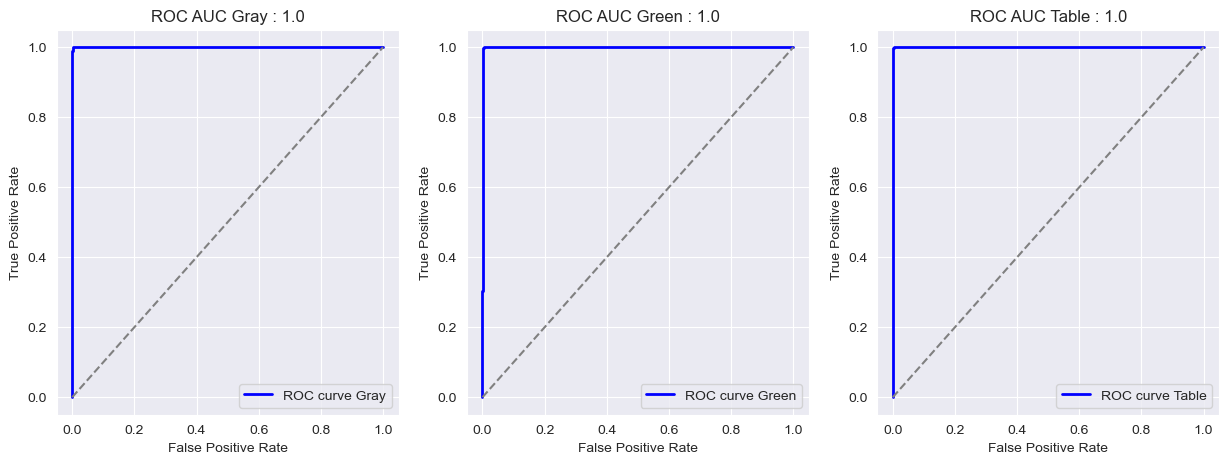

In [56]:
plot_ROC_curve(catboost_clf, X_valid, y_valid)

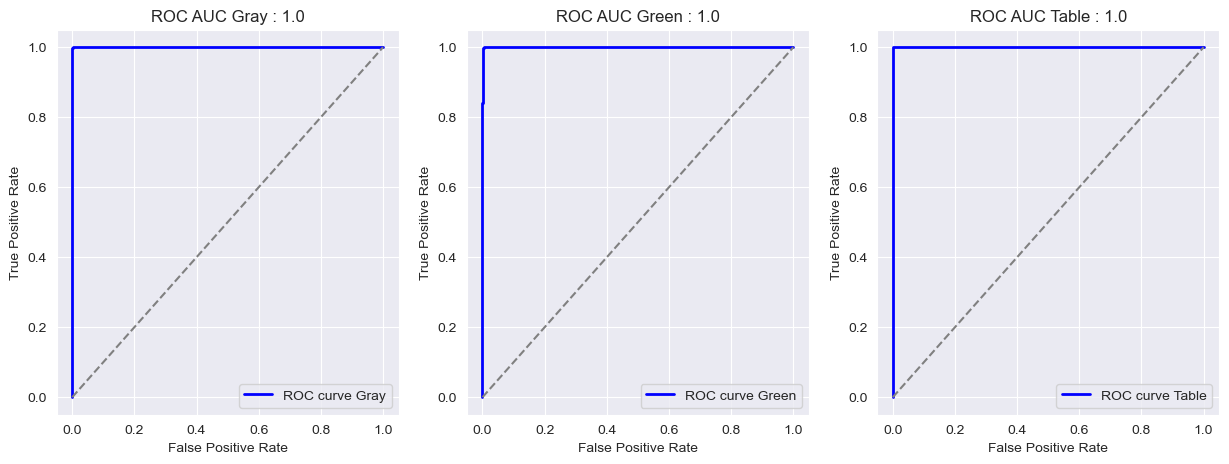

In [61]:
plot_ROC_curve(catboost_clf, X_test, y_test)

In [57]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.03, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
    }
    
    catboost_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('catboost', OneVsRestClassifier(CatBoostClassifier(
        **param,
        task_type='CPU',  # or 'GPU' if you have GPU support
        loss_function='Logloss',
        eval_metric='Accuracy',
        verbose=False,
        random_state = 42
    )))
    ])
    
    catboost_clf.fit(X_train, y_train)
    score = accuracy_score(y_valid, catboost_clf.predict(X_valid))
    return score

In [58]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-11-20 15:13:05,601] A new study created in memory with name: no-name-d09981b4-2173-40ec-b7c1-a978dd3735f9
[I 2024-11-20 15:13:41,711] Trial 0 finished with value: 0.9620726495726496 and parameters: {'iterations': 845, 'depth': 4, 'learning_rate': 0.013342894404125718, 'l2_leaf_reg': 0.5744206047234455, 'border_count': 109, 'random_strength': 6.947770722978309}. Best is trial 0 with value: 0.9620726495726496.
[I 2024-11-20 15:13:53,743] Trial 1 finished with value: 0.9631410256410257 and parameters: {'iterations': 251, 'depth': 7, 'learning_rate': 0.021318493476010208, 'l2_leaf_reg': 0.5226356450149958, 'border_count': 52, 'random_strength': 7.312514403220315}. Best is trial 1 with value: 0.9631410256410257.
[I 2024-11-20 15:14:22,461] Trial 2 finished with value: 0.9757326007326007 and parameters: {'iterations': 233, 'depth': 10, 'learning_rate': 0.020334759986150117, 'l2_leaf_reg': 1.1178749524069267, 'border_count': 36, 'random_strength': 7.269322872707364}. Best is trial 2 w

In [59]:
study.best_params

{'iterations': 815,
 'depth': 9,
 'learning_rate': 0.023409501109999592,
 'l2_leaf_reg': 3.2951721200641657,
 'border_count': 93,
 'random_strength': 7.6990743973312386}

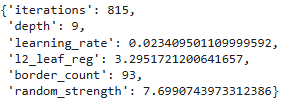

In [45]:
param = {'iterations': 815,
 'depth': 9,
 'learning_rate': 0.023409501109999592,
 'l2_leaf_reg': 3.2951721200641657,
 'border_count': 93,
 'random_strength': 7.6990743973312386}

catboost_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('catboost', OneVsRestClassifier(CatBoostClassifier(
        **param,
        task_type='CPU',  # or 'GPU' if you have GPU support
        loss_function='Logloss',
        eval_metric='Accuracy',
        verbose=False,
        random_state = 42
)))
])

catboost_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x000001FE3600C940>))])

In [46]:
print_metrics(catboost_clf, X_train, y_train)

Accuracy:  1.0
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
ROC AUC: [1. 1. 1.]


In [47]:
print_metrics(catboost_clf, X_valid, y_valid)

Accuracy:  0.998
Precision:  [0.998 0.998 0.999]
Recall:  [0.999 0.999 0.992]
F1 score:  [0.998 0.998 0.996]
ROC AUC: [1. 1. 1.]


In [48]:
print_metrics(catboost_clf, X_test, y_test)

Accuracy:  0.997
Precision:  [0.998 0.997 0.999]
Recall:  [0.998 0.999 0.996]
F1 score:  [0.998 0.998 0.998]
ROC AUC: [1. 1. 1.]


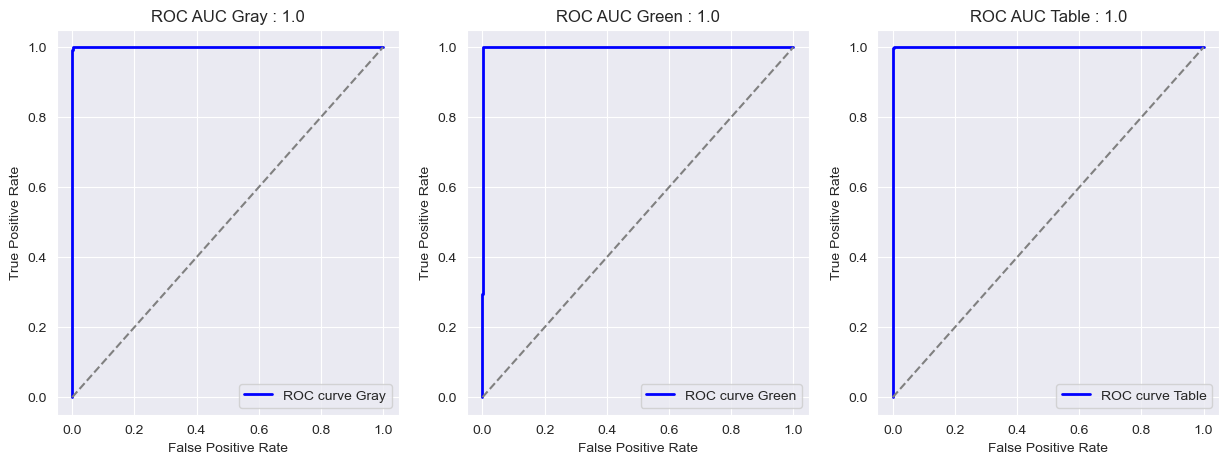

In [49]:
plot_ROC_curve(catboost_clf, X_valid, y_valid)

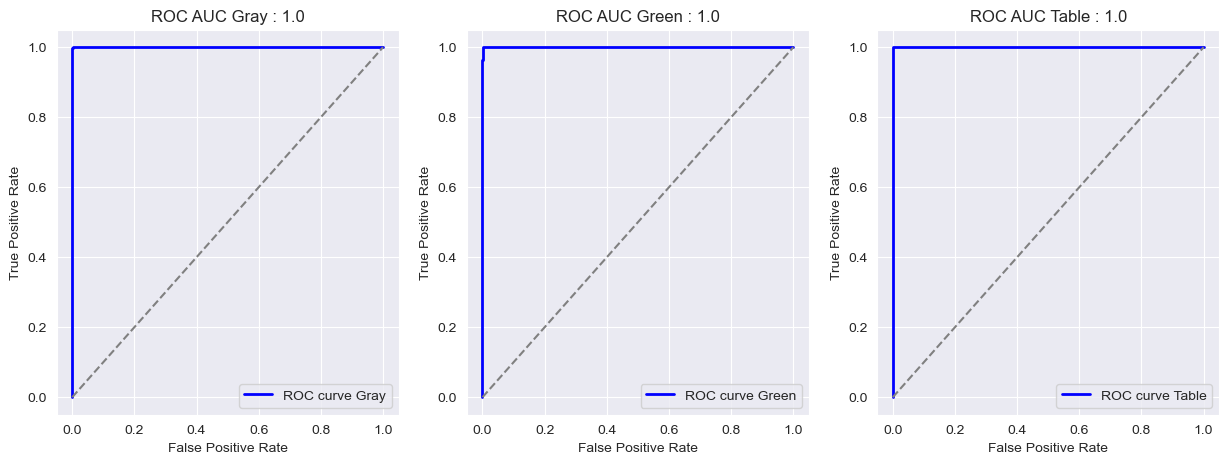

In [50]:
plot_ROC_curve(catboost_clf, X_test, y_test)

### 5. LightGBM Classifier

In [51]:
from lightgbm import LGBMClassifier

In [66]:
lightgbm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('lightgbm', OneVsRestClassifier(LGBMClassifier(random_state = 42)))
])

lightgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 12159, number of negative: 18414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6282
[LightGBM] [Info] Number of data points in the train set: 30573, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397704 -> initscore=-0.415042
[LightGBM] [Info] Start training from score -0.415042
[LightGBM] [Info] Number of positive: 14096, number of negative: 16477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6282
[LightGBM] [Info] Number of data points in the train set: 30573, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461060 -> initscore=-0.156074
[L

Pipeline(steps=[('scaler', StandardScaler()),
                ('lightgbm',
                 OneVsRestClassifier(estimator=LGBMClassifier(random_state=42)))])

In [67]:
print_metrics(lightgbm_clf, X_valid, y_valid)

Accuracy:  0.997
Precision:  [0.997 0.997 0.999]
Recall:  [0.999 0.999 0.994]
F1 score:  [0.998 0.998 0.997]
ROC AUC: [1. 1. 1.]


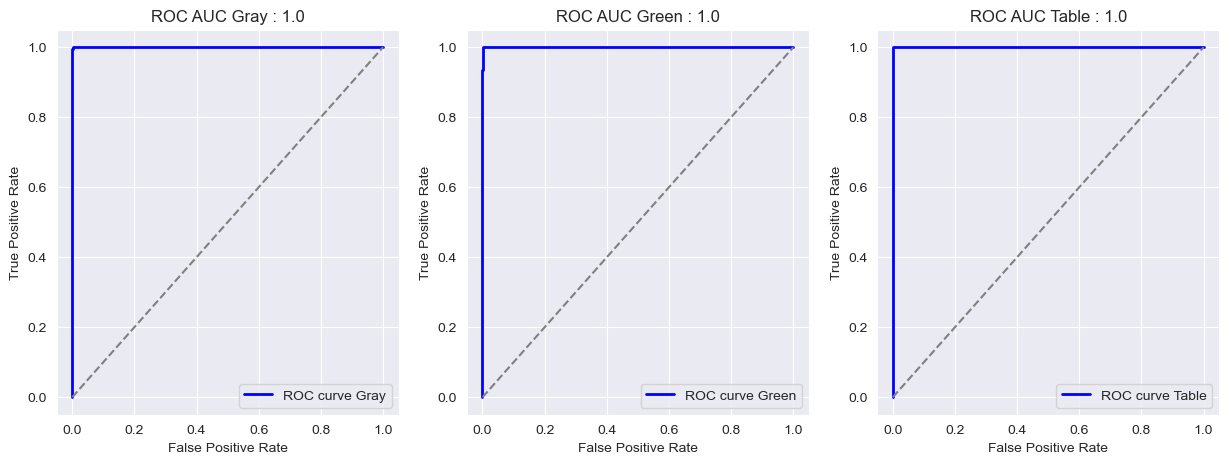

In [68]:
plot_ROC_curve(lightgbm_clf, X_valid, y_valid)

In [69]:
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True)
    }

    lightgbm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('lightgbm', OneVsRestClassifier(LGBMClassifier(**params, random_state = 42, verbose = -1)))
    ])

    lightgbm_clf.fit(X_train, y_train)
    score = accuracy_score(y_valid, lightgbm_clf.predict(X_valid))
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials= 50)

[I 2024-11-20 15:22:44,385] A new study created in memory with name: no-name-d2bf3b5b-a010-42c9-abaf-b3c6cb4e099f
[I 2024-11-20 15:22:49,070] Trial 0 finished with value: 0.4236111111111111 and parameters: {'n_estimators': 529, 'learning_rate': 0.00041439917839410523, 'max_depth': 6, 'num_leaves': 45, 'subsample': 0.5657440731151181, 'colsample_bytree': 0.5960169389073001, 'min_child_samples': 75, 'reg_alpha': 6.667872858921945e-08, 'reg_lambda': 0.0007996062187991733}. Best is trial 0 with value: 0.4236111111111111.
[I 2024-11-20 15:23:02,083] Trial 1 finished with value: 0.9555097680097681 and parameters: {'n_estimators': 662, 'learning_rate': 0.0008997247090743546, 'max_depth': 12, 'num_leaves': 120, 'subsample': 0.7460885476343375, 'colsample_bytree': 0.791572787913321, 'min_child_samples': 10, 'reg_alpha': 0.0006127523883143996, 'reg_lambda': 5.207293179169666}. Best is trial 1 with value: 0.9555097680097681.
[I 2024-11-20 15:23:10,218] Trial 2 finished with value: 0.7528235653235

[I 2024-11-20 15:25:52,555] Trial 20 finished with value: 0.9797771672771672 and parameters: {'n_estimators': 466, 'learning_rate': 0.007221994366330862, 'max_depth': 7, 'num_leaves': 64, 'subsample': 0.8120611556159941, 'colsample_bytree': 0.6801849288604878, 'min_child_samples': 99, 'reg_alpha': 2.286853998100422e-05, 'reg_lambda': 1.0409935615685437e-07}. Best is trial 12 with value: 0.9987026862026862.
[I 2024-11-20 15:26:03,358] Trial 21 finished with value: 0.9986263736263736 and parameters: {'n_estimators': 970, 'learning_rate': 0.09516668853552987, 'max_depth': 9, 'num_leaves': 90, 'subsample': 0.9565232597487489, 'colsample_bytree': 0.8919412659544135, 'min_child_samples': 36, 'reg_alpha': 6.237791297694556e-06, 'reg_lambda': 1.8054612250814834e-08}. Best is trial 12 with value: 0.9987026862026862.
[I 2024-11-20 15:26:12,732] Trial 22 finished with value: 0.9986263736263736 and parameters: {'n_estimators': 728, 'learning_rate': 0.09873870546908421, 'max_depth': 10, 'num_leaves

[I 2024-11-20 15:30:06,004] Trial 41 finished with value: 0.9986263736263736 and parameters: {'n_estimators': 883, 'learning_rate': 0.04658662670890926, 'max_depth': 9, 'num_leaves': 116, 'subsample': 0.970672909261908, 'colsample_bytree': 0.7995203462172027, 'min_child_samples': 51, 'reg_alpha': 7.847547194388076e-07, 'reg_lambda': 4.538945712916365e-08}. Best is trial 35 with value: 0.9987789987789988.
[I 2024-11-20 15:30:16,615] Trial 42 finished with value: 0.9987026862026862 and parameters: {'n_estimators': 761, 'learning_rate': 0.0654807870152888, 'max_depth': 8, 'num_leaves': 126, 'subsample': 0.9345280309614564, 'colsample_bytree': 0.5076424963490895, 'min_child_samples': 41, 'reg_alpha': 2.8084479246144693e-06, 'reg_lambda': 1.0386155721367817e-08}. Best is trial 35 with value: 0.9987789987789988.
[I 2024-11-20 15:30:25,169] Trial 43 finished with value: 0.9984737484737485 and parameters: {'n_estimators': 653, 'learning_rate': 0.06913035208511402, 'max_depth': 7, 'num_leaves':

In [74]:
study.best_params

{'n_estimators': 809,
 'learning_rate': 0.09653760263927706,
 'max_depth': 11,
 'num_leaves': 74,
 'subsample': 0.932747228651745,
 'colsample_bytree': 0.7795056922019703,
 'min_child_samples': 40,
 'reg_alpha': 6.158958361396088e-07,
 'reg_lambda': 2.86470292942101e-07}

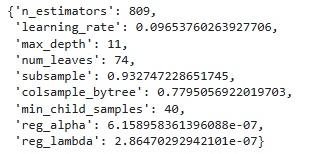

In [52]:
params = {'n_estimators': 809,
 'learning_rate': 0.09653760263927706,
 'max_depth': 11,
 'num_leaves': 74,
 'subsample': 0.932747228651745,
 'colsample_bytree': 0.7795056922019703,
 'min_child_samples': 40,
 'reg_alpha': 6.158958361396088e-07,
 'reg_lambda': 2.86470292942101e-07}

lightgbm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('lightgbm', OneVsRestClassifier(LGBMClassifier(**params, random_state = 42, verbose = -1)))
    ])

lightgbm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lightgbm',
                 OneVsRestClassifier(estimator=LGBMClassifier(colsample_bytree=0.7795056922019703,
                                                              learning_rate=0.09653760263927706,
                                                              max_depth=11,
                                                              min_child_samples=40,
                                                              n_estimators=809,
                                                              num_leaves=74,
                                                              random_state=42,
                                                              reg_alpha=6.158958361396088e-07,
                                                              reg_lambda=2.86470292942101e-07,
                                                              subsample=0.932747228651745,
                                                              verbose=-1)))])

In [53]:
print_metrics(lightgbm_clf, X_train, y_train)

Accuracy:  1.0
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 score:  [1. 1. 1.]
ROC AUC: [1. 1. 1.]


In [54]:
print_metrics(lightgbm_clf, X_valid, y_valid)

Accuracy:  0.999
Precision:  [0.999 0.999 1.   ]
Recall:  [1.    1.    0.994]
F1 score:  [0.999 0.999 0.997]
ROC AUC: [1. 1. 1.]


In [55]:
print_metrics(lightgbm_clf, X_test, y_test)

Accuracy:  0.999
Precision:  [0.999 0.999 1.   ]
Recall:  [0.999 0.999 0.997]
F1 score:  [0.999 0.999 0.999]
ROC AUC: [1. 1. 1.]


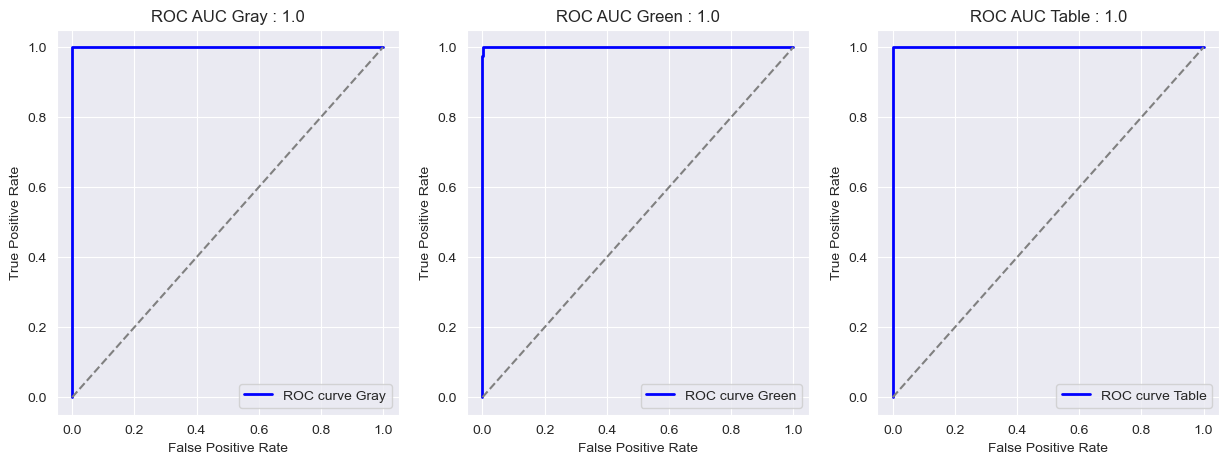

In [56]:
plot_ROC_curve(lightgbm_clf, X_valid, y_valid)

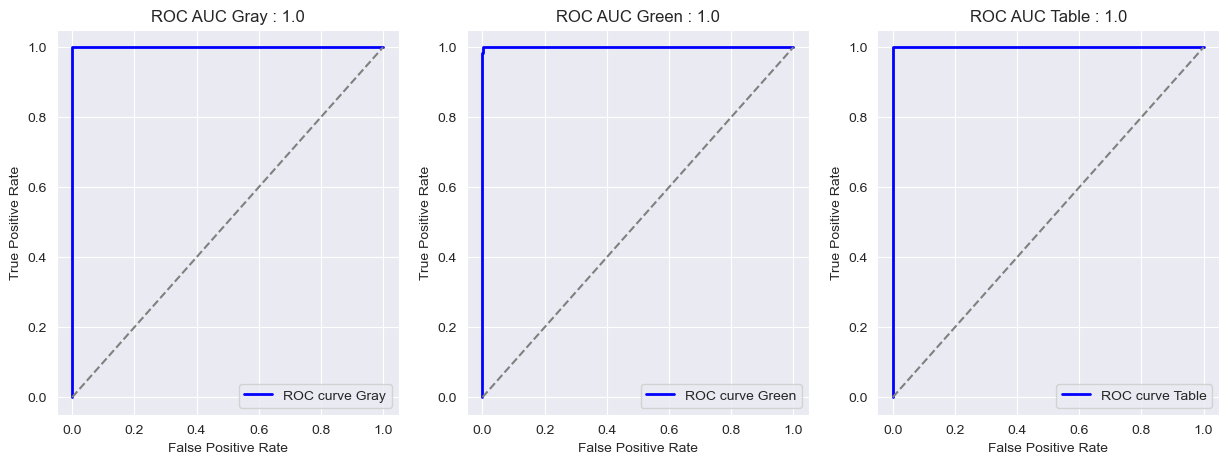

In [57]:
plot_ROC_curve(lightgbm_clf, X_test, y_test)

### 6. Neural network

In [58]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [81]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (28, )),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs = 20,
#                     validation_data=(X_valid, y_valid))

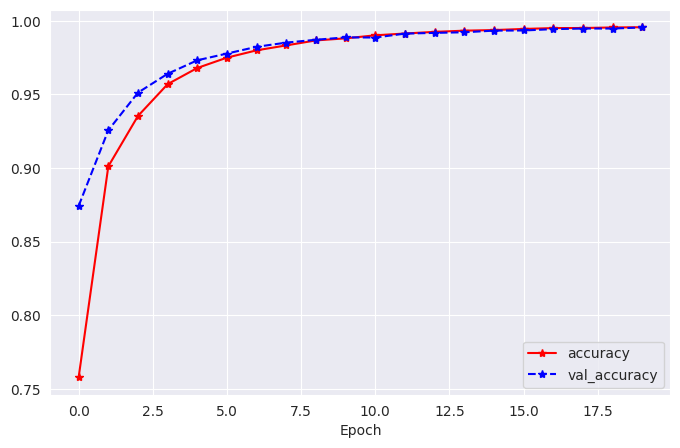

In [55]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(
    figsize = (8, 5), grid = True, xlabel = 'Epoch',
    style = ['r-*', 'b--*'])

plt.show()

In [56]:
predicted_labels = (model.predict(X_valid) > 0.5).astype(int)

308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [60]:
def print_metrics(model, X_valid, y_valid):
  y_pred = (model.predict(X_valid) > 0.5).astype(int)
  y_pred_proba = model.predict(X_valid)

  print("Accuracy: ", round(accuracy_score(y_valid, y_pred), 3))
  print("Precision: ", precision_score(y_valid, y_pred, average = None).round(3))
  print("Recall: ", recall_score(y_valid, y_pred, average = None).round(3))
  print("F1 score: ", f1_score(y_valid, y_pred, average = None).round(3))
  print("ROC AUC:", roc_auc_score(y_valid, y_pred_proba,
              multi_class = 'ovr', average = None).round(3))

# print_metrics(model, X_valid, y_valid)

In [61]:
def plot_ROC_curve(model, X_valid, y_valid):
  plt.figure(figsize = (15, 5))
  classes = ["Gray", "Green", "Table"]
   # Calculate ROC AUC scores
  roc_auc_scores = roc_auc_score(y_valid, model.predict(X_valid),
              multi_class = 'ovr', average = None).round(3)
  for i in range(3):
    c = classes[i]
    roc_auc = roc_auc_scores[i]

    fpr, tpr, thresholds = roc_curve(y_valid[:, i], model.predict(X_valid)[:, i])
    ax = plt.subplot(1,3 ,i+1)
    ax.plot(fpr, tpr, linewidth=2, label=f"ROC curve {c}", c = "b")
    ax.plot([0, 1], [0 ,1], '--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC AUC {c} : {roc_auc}")
    ax.legend()

# plot_ROC_curve(model, X_valid, y_valid)

In [81]:
# loss, accuracy = model.evaluate(X_test, y_test)

In [62]:
def objective(trial):
  model = tf.keras.Sequential()
  model.add(tf.keras.Input(shape = (28, )))

  n_layers = trial.suggest_int('n_layers', 2, 5)
  for i in range(n_layers):
    n_units = trial.suggest_int(f'n_units_{i}', 16, 128)
    activation = trial.suggest_categorical(f'activation_{i}', ['relu', 'sigmoid', 'relu'])
    model.add(tf.keras.layers.Dense(n_units, activation="relu"))

    dropout_rate = trial.suggest_float(f'dropout_rate_{i}', 0.0, 0.3)
    model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(3, activation = "softmax"))

  lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
  epochs = trial.suggest_int('epochs', 10, 50)
  optimizer = tf.keras.optimizers.Adam(learning_rate= lr)
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

  model.fit(X_train, y_train, epochs = epochs,
                    validation_data=(X_valid, y_valid), verbose = 0)

  loss, accuracy = model.evaluate(X_valid, y_valid)
  return accuracy

In [70]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials= 10)

[I 2024-10-25 17:40:33,165] A new study created in memory with name: no-name-0afb90de-c0f8-413a-ad95-dc90fb54a95c


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9957 - loss: 0.0112


[I 2024-10-25 17:41:52,667] Trial 0 finished with value: 0.9966422319412231 and parameters: {'n_layers': 3, 'n_units_0': 118, 'activation_0': 'relu', 'dropout_rate_0': 0.04762202409012216, 'n_units_1': 54, 'activation_1': 'sigmoid', 'dropout_rate_1': 0.13921785823296787, 'n_units_2': 82, 'activation_2': 'relu', 'dropout_rate_2': 0.018241623996614543, 'lr': 0.00024321725349415267, 'epochs': 22}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9509 - loss: 0.1442


[I 2024-10-25 17:43:25,952] Trial 1 finished with value: 0.954721212387085 and parameters: {'n_layers': 2, 'n_units_0': 119, 'activation_0': 'sigmoid', 'dropout_rate_0': 0.21390890211086053, 'n_units_1': 91, 'activation_1': 'relu', 'dropout_rate_1': 0.29133892301000264, 'lr': 1.341555572060227e-05, 'epochs': 33}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9937 - loss: 0.0193


[I 2024-10-25 17:45:37,367] Trial 2 finished with value: 0.9944037199020386 and parameters: {'n_layers': 4, 'n_units_0': 42, 'activation_0': 'relu', 'dropout_rate_0': 0.021130589889317063, 'n_units_1': 24, 'activation_1': 'relu', 'dropout_rate_1': 0.20823995781534557, 'n_units_2': 63, 'activation_2': 'sigmoid', 'dropout_rate_2': 0.1034171474988976, 'n_units_3': 37, 'activation_3': 'relu', 'dropout_rate_3': 0.12198022401536057, 'lr': 0.00012039375589008366, 'epochs': 31}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9968 - loss: 0.0105


[I 2024-10-25 17:48:29,664] Trial 3 finished with value: 0.9965404868125916 and parameters: {'n_layers': 5, 'n_units_0': 88, 'activation_0': 'relu', 'dropout_rate_0': 0.16639507412133753, 'n_units_1': 79, 'activation_1': 'relu', 'dropout_rate_1': 0.27553841941822704, 'n_units_2': 18, 'activation_2': 'relu', 'dropout_rate_2': 0.14836231497271993, 'n_units_3': 48, 'activation_3': 'relu', 'dropout_rate_3': 0.025678897398351684, 'n_units_4': 125, 'activation_4': 'relu', 'dropout_rate_4': 0.003436582990549264, 'lr': 0.00011743126844369443, 'epochs': 48}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.2361


[I 2024-10-25 17:49:52,311] Trial 4 finished with value: 0.9155474305152893 and parameters: {'n_layers': 2, 'n_units_0': 66, 'activation_0': 'sigmoid', 'dropout_rate_0': 0.21968425748445206, 'n_units_1': 78, 'activation_1': 'relu', 'dropout_rate_1': 0.07524086663819364, 'lr': 1.2471585473170277e-05, 'epochs': 26}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.0953


[I 2024-10-25 17:51:49,254] Trial 5 finished with value: 0.9669312238693237 and parameters: {'n_layers': 4, 'n_units_0': 19, 'activation_0': 'relu', 'dropout_rate_0': 0.03809785251959203, 'n_units_1': 81, 'activation_1': 'relu', 'dropout_rate_1': 0.22158399707685802, 'n_units_2': 66, 'activation_2': 'sigmoid', 'dropout_rate_2': 0.23960322349297983, 'n_units_3': 41, 'activation_3': 'relu', 'dropout_rate_3': 0.13395929581998842, 'lr': 3.566367633565564e-05, 'epochs': 30}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.3510


[I 2024-10-25 17:52:55,541] Trial 6 finished with value: 0.8602970838546753 and parameters: {'n_layers': 2, 'n_units_0': 21, 'activation_0': 'relu', 'dropout_rate_0': 0.1461804518798721, 'n_units_1': 105, 'activation_1': 'relu', 'dropout_rate_1': 0.13628056254481108, 'lr': 1.0796972683229068e-05, 'epochs': 20}. Best is trial 0 with value: 0.9966422319412231.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9977 - loss: 0.0066


[I 2024-10-25 17:55:05,855] Trial 7 finished with value: 0.9977614879608154 and parameters: {'n_layers': 3, 'n_units_0': 97, 'activation_0': 'sigmoid', 'dropout_rate_0': 0.20955043058567827, 'n_units_1': 106, 'activation_1': 'relu', 'dropout_rate_1': 0.035061679478218866, 'n_units_2': 63, 'activation_2': 'relu', 'dropout_rate_2': 0.11048264252169115, 'lr': 0.00028324334849388015, 'epochs': 43}. Best is trial 7 with value: 0.9977614879608154.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9954 - loss: 0.0153


[I 2024-10-25 17:56:43,085] Trial 8 finished with value: 0.9948107600212097 and parameters: {'n_layers': 5, 'n_units_0': 38, 'activation_0': 'relu', 'dropout_rate_0': 0.23871365861231852, 'n_units_1': 57, 'activation_1': 'relu', 'dropout_rate_1': 0.19149111516400433, 'n_units_2': 44, 'activation_2': 'sigmoid', 'dropout_rate_2': 0.13768213127430878, 'n_units_3': 77, 'activation_3': 'relu', 'dropout_rate_3': 0.016734909523685615, 'n_units_4': 55, 'activation_4': 'relu', 'dropout_rate_4': 0.07306351149758489, 'lr': 0.0006854968617931995, 'epochs': 21}. Best is trial 7 with value: 0.9977614879608154.


308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.2982


[I 2024-10-25 17:57:38,592] Trial 9 finished with value: 0.8874644041061401 and parameters: {'n_layers': 2, 'n_units_0': 31, 'activation_0': 'sigmoid', 'dropout_rate_0': 0.03690752677370097, 'n_units_1': 74, 'activation_1': 'relu', 'dropout_rate_1': 0.29537007597410586, 'lr': 1.5081897557060414e-05, 'epochs': 17}. Best is trial 7 with value: 0.9977614879608154.


In [ ]:
# study.best_params

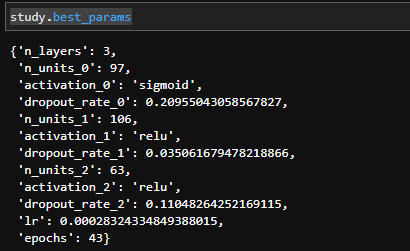

In [64]:
best_model = tf.keras.Sequential([
    tf.keras.Input(shape = (28, )),
    tf.keras.layers.Dense(97, activation="sigmoid"),
    tf.keras.layers.Dropout(0.20955043058567827),
    tf.keras.layers.Dense(106, activation="relu"),
    tf.keras.layers.Dropout(0.035061679478218866),
    tf.keras.layers.Dense(63, activation="relu"),
    tf.keras.layers.Dropout(0.11048264252169115),
    tf.keras.layers.Dense(3, activation = "softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00028324334849388015)
best_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = best_model.fit(X_train, y_train, epochs = 43,
                    validation_data=(X_valid, y_valid))

Epoch 1/43
1229/1229 [==============================] - 9s 6ms/step - loss: 0.5752 - accuracy: 0.7231 - val_loss: 0.3859 - val_accuracy: 0.8224
Epoch 2/43
1229/1229 [==============================] - 6s 5ms/step - loss: 0.4238 - accuracy: 0.8035 - val_loss: 0.3537 - val_accuracy: 0.8407
Epoch 3/43
1229/1229 [==============================] - 9s 8ms/step - loss: 0.3879 - accuracy: 0.8243 - val_loss: 0.3088 - val_accuracy: 0.8734
Epoch 4/43
1229/1229 [==============================] - 8s 6ms/step - loss: 0.3420 - accuracy: 0.8519 - val_loss: 0.2406 - val_accuracy: 0.9079
Epoch 5/43
1229/1229 [==============================] - 6s 5ms/step - loss: 0.2906 - accuracy: 0.8761 - val_loss: 0.1855 - val_accuracy: 0.9304
Epoch 6/43
1229/1229 [==============================] - 8s 6ms/step - loss: 0.2490 - accuracy: 0.8956 - val_loss: 0.1500 - val_accuracy: 0.9488
Epoch 7/43
1229/1229 [==============================] - 8s 6ms/step - loss: 0.2196 - accuracy: 0.9107 - val_loss: 0.1340 - val_accuracy:

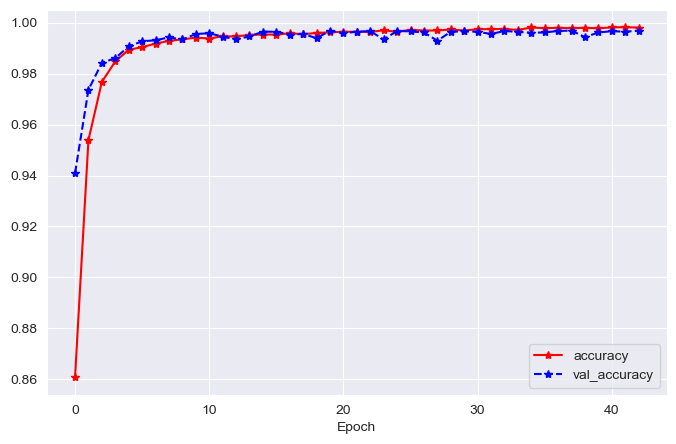

In [86]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(
    figsize = (8, 5), grid = True, xlabel = 'Epoch',
    style = ['r-*', 'b--*'])

plt.show()

In [66]:
print_metrics(best_model, X_train, y_train)

1229/1229 [==============================] - 4s 3ms/step
Accuracy:  0.995
Precision:  [0.994 0.996 0.999]
Recall:  [0.996 0.995 0.993]
F1 score:  [0.995 0.995 0.996]
ROC AUC: [1. 1. 1.]


In [69]:
print_metrics(best_model, X_valid, y_valid)

308/308 [==============================] - 1s 2ms/step
Accuracy:  0.996
Precision:  [0.996 0.995 0.999]
Recall:  [0.995 0.997 0.996]
F1 score:  [0.995 0.996 0.998]
ROC AUC: [1. 1. 1.]


In [70]:
print_metrics(best_model, X_test, y_test)

171/171 [==============================] - 0s 3ms/step
Accuracy:  0.994
Precision:  [0.992 0.993 1.   ]
Recall:  [0.994 0.994 0.992]
F1 score:  [0.993 0.993 0.996]
ROC AUC: [1. 1. 1.]


308/308 [==============================] - 1s 3ms/step


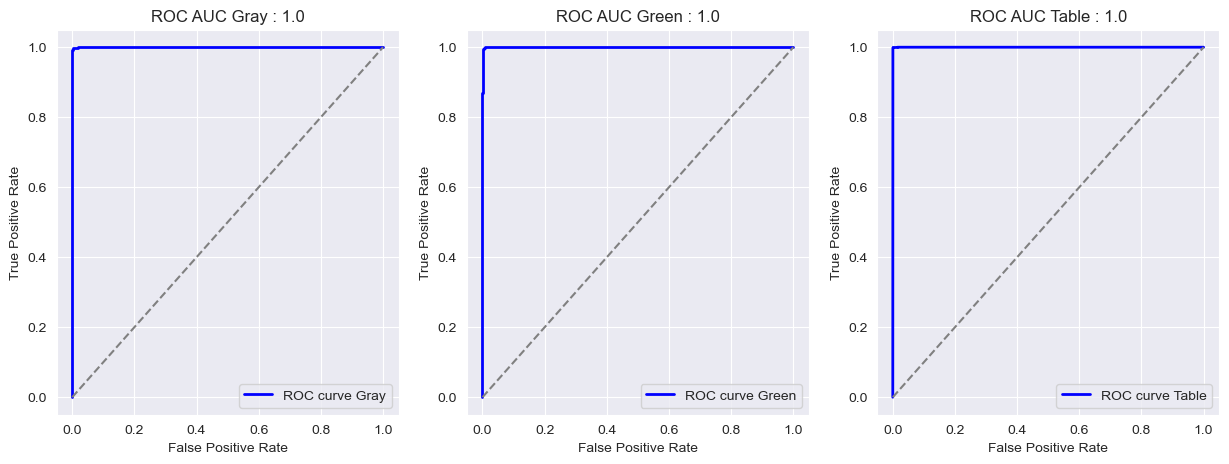

In [71]:
plot_ROC_curve(best_model, X_valid, y_valid)

171/171 [==============================] - 1s 3ms/step


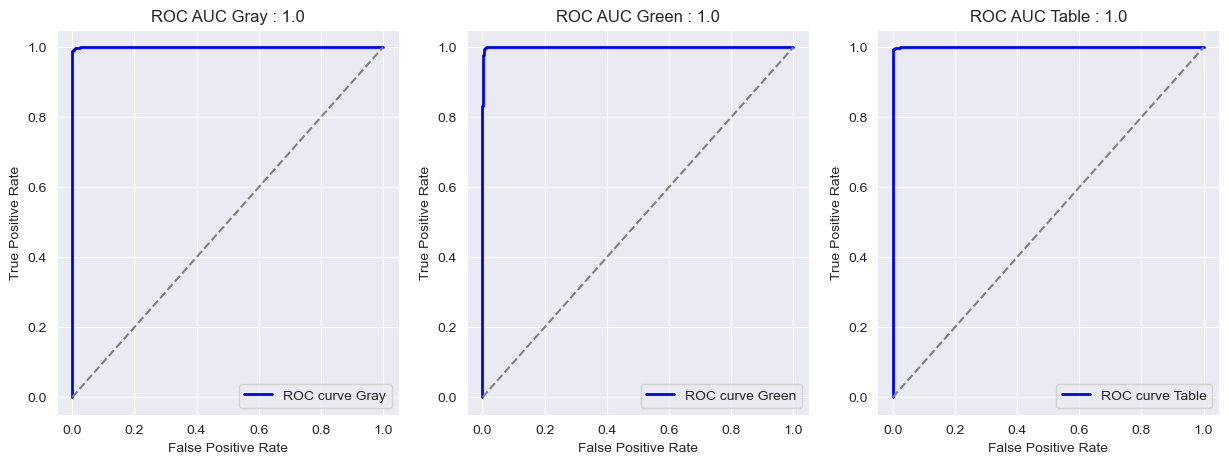

In [72]:
plot_ROC_curve(best_model, X_test, y_test)